In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, classification_report
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score, GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [94]:
df = pd.read_csv('Brain_GSE50161.csv')
df.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,834,ependymoma,12.498150,7.604868,6.880934,9.027128,4.176175,7.224920,6.085942,6.835999,...,9.979005,9.926470,12.719785,12.777792,5.403657,4.870548,4.047380,3.721936,4.516434,4.749940
1,835,ependymoma,13.067436,7.998090,7.209076,9.723322,4.826126,7.539381,6.250962,8.012549,...,11.924749,11.215930,13.605662,13.401342,5.224555,4.895315,3.786437,3.564481,4.430891,4.491416
2,836,ependymoma,13.068179,8.573674,8.647684,9.613002,4.396581,7.813101,6.007746,7.178156,...,12.154405,11.532460,13.764593,13.477800,5.303565,5.052184,4.005343,3.595382,4.563494,4.668827
3,837,ependymoma,12.456040,9.098977,6.628784,8.517677,4.154847,8.361843,6.596064,6.347285,...,11.969072,11.288801,13.600828,13.379029,4.953429,4.708371,3.892318,3.759429,4.748381,4.521275
4,838,ependymoma,12.699958,8.800721,11.556188,9.166309,4.165891,7.923826,6.212754,6.866387,...,11.411701,11.169317,13.751442,13.803646,4.892677,4.773806,3.796856,3.577544,4.504385,4.541450


In [36]:
df.drop('samples', axis=1, inplace=True)

In [37]:
df.isnull().values.any()

False

Text(0.5, 1.0, 'Frequency of Case Types in Data')

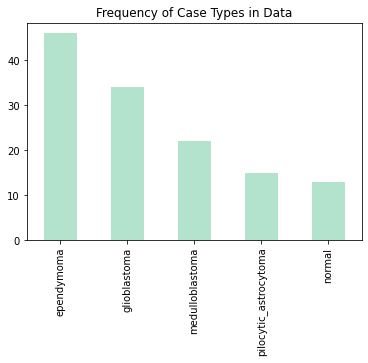

In [38]:
df['type'].value_counts().plot(kind = 'bar', colormap='Pastel2')
plt.title('Frequency of Case Types in Data')

In [39]:
ep_df = df[df['type'] == 'ependymoma'] 
gl_df = df[df['type'] == 'glioblastoma'] 
me_df = df[df['type'] == 'medulloblastoma'] 
pi_df = df[df['type'] == 'pilocytic_astrocytoma'] 
n_df = df[df['type'] == 'normal'] 

Text(0, 0.5, 'Expression Levels')

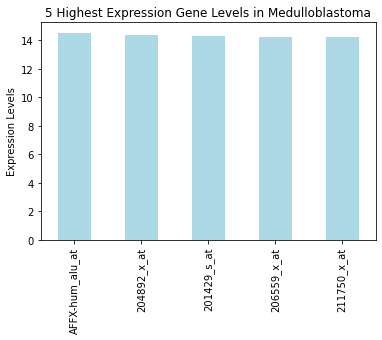

In [40]:
me_highest = me_df.mean().abs().sort_values(ascending = False)
plt.figure(figsize=(6, 4))
me_highest.head(5).plot(kind = 'bar', color='lightblue')
plt.title('5 Highest Expression Gene Levels in Medulloblastoma')
plt.ylabel('Expression Levels')

Text(0, 0.5, 'Expression Levels')

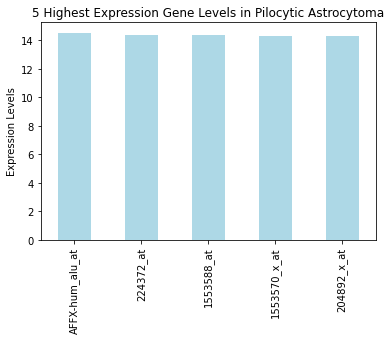

In [41]:
pi_highest = pi_df.mean().abs().sort_values(ascending = False)
plt.figure(figsize=(6, 4))
pi_highest.head(5).plot(kind = 'bar', color='lightblue')
plt.title('5 Highest Expression Gene Levels in Pilocytic Astrocytoma')
plt.ylabel('Expression Levels')

Text(0, 0.5, 'Expression Levels')

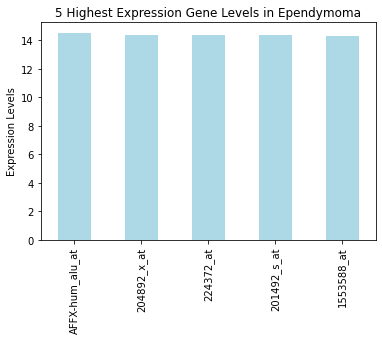

In [42]:
ep_highest = ep_df.mean().abs().sort_values(ascending = False)
plt.figure(figsize=(6, 4))
ep_highest.head(5).plot(kind = 'bar', color='lightblue')
plt.title('5 Highest Expression Gene Levels in Ependymoma')
plt.ylabel('Expression Levels')

Text(0, 0.5, 'Expression Levels')

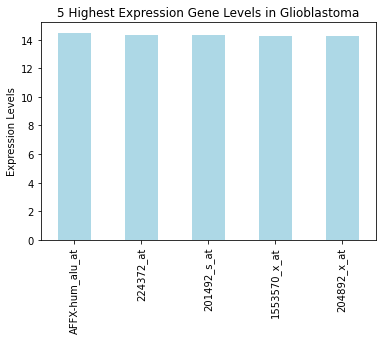

In [43]:
gl_highest = gl_df.mean().abs().sort_values(ascending = False)
plt.figure(figsize=(6, 4))
gl_highest.head(5).plot(kind = 'bar', color='lightblue')
plt.title('5 Highest Expression Gene Levels in Glioblastoma')
plt.ylabel('Expression Levels')

Text(0, 0.5, 'Expression Levels')

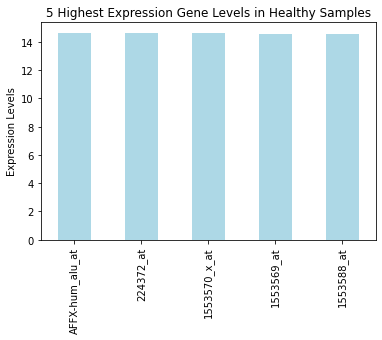

In [44]:
n_highest = n_df.mean().abs().sort_values(ascending = False)
plt.figure(figsize=(6, 4))
n_highest.head(5).plot(kind = 'bar', color='lightblue')
plt.title('5 Highest Expression Gene Levels in Healthy Samples')
plt.ylabel('Expression Levels')

In [45]:
ep_highest = pd.DataFrame(ep_highest, columns= ['ependymoma'])
gl_highest = pd.DataFrame(gl_highest, columns= ['glioblastoma'])
me_highest = pd.DataFrame(me_highest, columns= ['medulloblastoma'])
pi_highest = pd.DataFrame(pi_highest, columns= ['pilocytic_astrocytoma'])
n_highest = pd.DataFrame(n_highest, columns= ['normal'])

data_frames = [ep_highest, gl_highest, me_highest, pi_highest, n_highest]
by_tumor = pd.concat(data_frames, join='outer', axis=1).fillna('NA')

In [46]:
var_df = by_tumor.var(axis=1)
var_df = pd.DataFrame(var_df, columns=['variance'])
data_frames = [by_tumor, var_df]
var_df = pd.concat(data_frames, join='outer', axis=1).fillna('NA')
highest_var_all = var_df.sort_values(by = 'variance',ascending = False)
highest_var = highest_var_all.iloc[:10]
highest_var.drop(['variance'], axis=1, inplace=True)

In [47]:
highest_var_all.head(20)

,ependymoma,glioblastoma,medulloblastoma,pilocytic_astrocytoma,normal,variance
1568612_at,4.426834,5.953667,9.186332,4.615742,11.354087,9.270301
221805_at,4.472807,7.004822,6.367429,5.506021,12.268795,9.175552
203001_s_at,6.650867,9.083943,12.667659,7.682313,13.073175,8.461631
210016_at,4.981243,6.828656,10.259218,6.157811,11.413329,7.651900
206502_s_at,6.451840,8.974249,12.738033,5.688730,8.239764,7.579641
208650_s_at,9.592566,8.122156,11.544823,4.728293,6.186445,7.275984
203000_at,6.985046,9.446125,12.684769,8.059411,12.886813,7.175878
231771_at,5.608844,5.695147,4.601958,4.767646,11.027777,7.104692
242128_at,4.845109,5.012456,10.729009,4.392994,5.089728,7.020662
230303_at,5.913120,7.029332,7.980667,5.552178,11.995467,6.696378


Text(0, 0.5, 'Expression Levels')

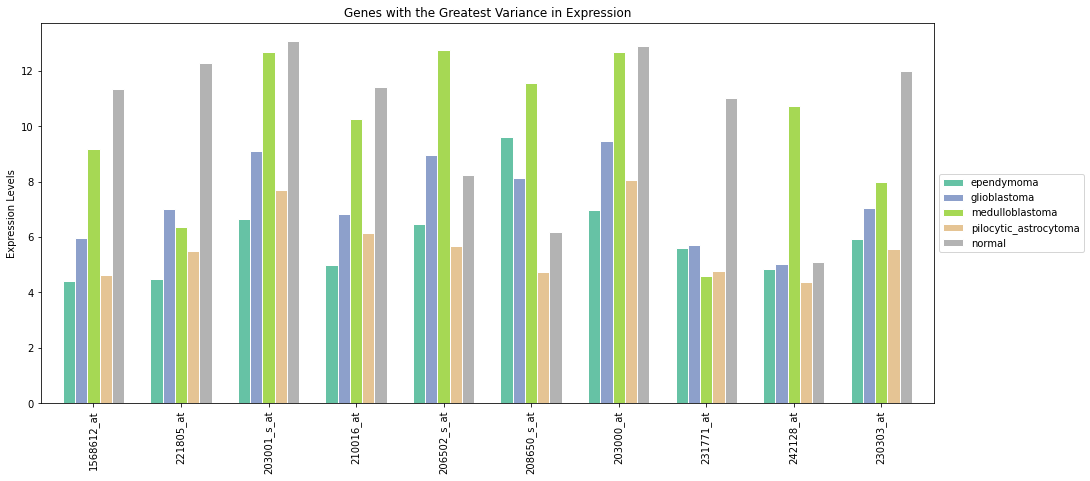

In [48]:
highest_var.plot(kind = 'bar', figsize=(16,7), colormap='Set2',
                edgecolor='white', linewidth=1, width=0.7)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Genes with the Greatest Variance in Expression')
plt.ylabel('Expression Levels')

## Several Genes are Downregulated in all Cancers in this Study
- 221805_at is the probe that corresponds to the gene NEFL. The NEFL gene encodes the neurofilament light polypeptide, a subunit that forms type IV intermediate filament heteropolymers, which are a major component of the neuronal cytoskeleton.
- The 231771_at probe corresponds to the GJB6 gene. GJB6 provides instructions for making a protein called gap junction beta 6, more commonly known as connexin 30. The connexin gene family codes for the protein subunits of gap junction channels that mediate direct diffusion of ions and metabolites between the cytoplasm of adjacent cells.
- 230303_at corresponds to the SYNPR gene. It codes intrinsic membrane proteins of small synaptic vesicles.

This study indicates these genes can potentially function as tumor suppressors.

## CD24 is Upregulated in all Tumors except Pilocytic Astrocytoma
Th 208650_s_at probe corresponds the the CD24 gene, which is actively being investigated as an immunotherapy target. This gene encodes a sialoglycoprotein that is expressed on mature granulocytes and B cells and modulates growth and differentiation signals to these cells. 


In [66]:
X = df.drop(columns='type')
y = df['type']

In [67]:
y = LabelEncoder().fit_transform(y)
# 0 = ependymoma
# 1 = glioblastoma
# 2 = medulloblastoma
# 3 = normal
# 4 = pilocytic_astrocytoma

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,stratify = y,random_state = 22)

In [69]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [70]:
pca = PCA()
pca.fit_transform(X_train)

array([[-4.41578546e+01, -4.51118947e+01,  2.55978610e+01, ...,
        -1.05687588e+00, -4.54400309e+00,  4.91578492e-14],
       [ 1.00681605e+02,  1.04188967e+02, -9.96509006e+01, ...,
         1.57107564e+00,  6.46214592e-01,  4.91578492e-14],
       [ 1.52939858e+02, -4.91439046e+01,  8.31693822e+00, ...,
         1.13671169e+01, -1.07459398e+01,  4.91578492e-14],
       ...,
       [-1.10456320e+02, -7.81547913e+00, -1.91106985e+01, ...,
        -3.09256812e-01, -1.89798492e+00,  4.91578492e-14],
       [ 8.70516223e+01, -9.04411513e+01, -3.74544128e+01, ...,
        -3.98656503e+01, -3.69200492e+01,  4.91578492e-14],
       [-1.36889750e+02,  1.33088890e+02, -6.91548919e+01, ...,
         3.98808388e-01,  4.60823203e-01,  4.91578492e-14]])

In [71]:
total=sum(pca.explained_variance_)
k=0
current_variance=0
while current_variance/total < 0.99:
    current_variance += pca.explained_variance_[k]
    k=k+1
k

97

In [72]:
pca = PCA(n_components=k)
X_train_pca=pca.fit_transform(X_train)
X_test_pca=pca.transform(X_test)

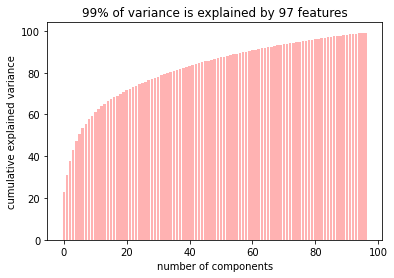

In [73]:
cum_sum = pca.explained_variance_ratio_.cumsum()
cum_sum = cum_sum*100
plt.bar(range(k), cum_sum, color = 'r',alpha=0.3)
plt.title("99% of variance is explained by 97 features")
plt.ylabel('cumulative explained variance')
plt.xlabel('number of components')
plt.locator_params(axis='y', nbins=10)


In [74]:
def evaluate_model(X, y, model):
    k = 5
    rep = 3
    cv = RepeatedStratifiedKFold(n_splits=k, n_repeats=rep, random_state=21)
    score = cross_val_score(model, X, y, scoring='f1_weighted', cv=cv, n_jobs=-1)
    return score

def get_models():
    models, names = list(), list()
    
    models.append(SVC())
    names.append('SVC')
    
    models.append(KNeighborsClassifier())
    names.append('KNN')
    
    models.append(BaggingClassifier())
    names.append('BC')
    
    models.append(RandomForestClassifier())
    names.append('RF')
        
    models.append(ExtraTreesClassifier())
    names.append('ET')
    
    return models, names

SVC 0.846 (0.051)
KNN 0.776 (0.104)
BC 0.714 (0.078)
RF 0.682 (0.097)
ET 0.721 (0.116)


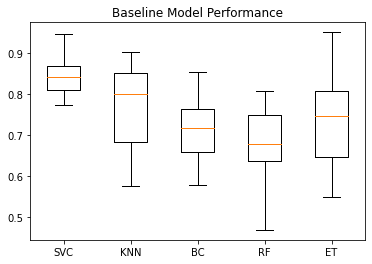

In [97]:
models, names = get_models()
results = list()

for i in range(len(models)):
    score = evaluate_model(X_train_pca, y_train, models[i])
    results.append(score)
    print('%s %.3f (%.3f)' % (names[i], np.mean(score), np.std(score)))

plt.boxplot(results, labels=names)
plt.title('Baseline Model Performance')

plt.show()

In [87]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1)
grid.fit(X_train_pca, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    0.6s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=1)

In [88]:
print(grid.best_estimator_)

SVC(C=0.1, gamma=1, kernel='poly')


In [90]:
grid_predictions = grid.predict(X_test_pca)
print('Confusion Matrix \n', confusion_matrix(y_test, grid_predictions), '\n')
target_names = ['ependymoma', 'glioblastoma', 'medulloblastoma', 'normal', 'pilocytic astrocytoma']
print(classification_report(y_test, grid_predictions, target_names=target_names))

Confusion Matrix 
 [[8 0 0 0 1]
 [0 6 0 0 1]
 [1 0 3 0 0]
 [1 0 0 2 0]
 [0 0 0 0 3]] 

                       precision    recall  f1-score   support

           ependymoma       0.80      0.89      0.84         9
         glioblastoma       1.00      0.86      0.92         7
      medulloblastoma       1.00      0.75      0.86         4
               normal       1.00      0.67      0.80         3
pilocytic astrocytoma       0.60      1.00      0.75         3

             accuracy                           0.85        26
            macro avg       0.88      0.83      0.83        26
         weighted avg       0.88      0.85      0.85        26



## This model had an overall 85% accuracy of correctly identifying the tumor type in this dataset.

This dataset was relatively small (130 samples) which limited the training capability of the model. The model performace would be improved as more data is collected. Further insights could also be gained from the evaluation of the gene expression variance.